In [14]:
import pandas as pd
import os
import os.path

In [15]:
import sys
print(sys.path)

['/Users/4lali/Documents/IFA', '/Users/4lali/miniconda3/envs/jupyter/lib/python310.zip', '/Users/4lali/miniconda3/envs/jupyter/lib/python3.10', '/Users/4lali/miniconda3/envs/jupyter/lib/python3.10/lib-dynload', '', '/Users/4lali/miniconda3/envs/jupyter/lib/python3.10/site-packages']


In [16]:
from PIL import Image
import numpy as np
from tqdm import tqdm
import pandas as pd

train_images = []
train_labels = []#pd.DataFrame(columns=['path', 'lable'])
path = []
test_images = []


# create training data set
for index, img_path in enumerate(tqdm(os.listdir('/Users/4lali/Documents/IFA/mkfold/fold1/train/40X/'), desc ="Loading training images")):
            
  train_images.append(np.array(Image.open('/Users/4lali/Documents/IFA/mkfold/fold1/train/40X/' + img_path)))
  lable = 1 if '_M_' in img_path else 0 
  path.append('/Users/4lali/Documents/IFA/mkfold/fold1/train/40X/'+img_path)
  train_labels.append(lable)

  #train_labels.concat({'path': '/Users/4lali/Downloads/mkfold/fold1/train/40X/'+img_path ,'lable': lable}, ignore_index=True)

train_labels =np.array(train_labels)
path= np.array(path)

train = np.array(train_images)
trainlabels_df = pd.DataFrame({'path': path, 'lable': train_labels})
print(trainlabels_df)

                                

Loading training images: 100%|██████████████| 1250/1250 [00:16<00:00, 77.20it/s]

                                                   path  lable
0     /Users/4lali/Documents/IFA/mkfold/fold1/train/...      1
1     /Users/4lali/Documents/IFA/mkfold/fold1/train/...      1
2     /Users/4lali/Documents/IFA/mkfold/fold1/train/...      1
3     /Users/4lali/Documents/IFA/mkfold/fold1/train/...      1
4     /Users/4lali/Documents/IFA/mkfold/fold1/train/...      1
...                                                 ...    ...
1245  /Users/4lali/Documents/IFA/mkfold/fold1/train/...      1
1246  /Users/4lali/Documents/IFA/mkfold/fold1/train/...      1
1247  /Users/4lali/Documents/IFA/mkfold/fold1/train/...      1
1248  /Users/4lali/Documents/IFA/mkfold/fold1/train/...      1
1249  /Users/4lali/Documents/IFA/mkfold/fold1/train/...      1

[1250 rows x 2 columns]



/var/folders/5q/blc7dkys1qzcs8x_qlcrdy6c0000gn/T/ipykernel_15357/685078019.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array(train_images)


In [17]:
### test

test_images = []
path = []
test_labels= []

# create training data set
for index, img_path in enumerate(tqdm(os.listdir('/Users/4lali/Documents/IFA/mkfold/fold1/test/40X/'), desc ="Loading test images")):
            
  test_images.append(np.array(Image.open('/Users/4lali/Documents/IFA/mkfold/fold1/test/40X/' + img_path)))
  lable = 1 if '_M_' in img_path else 0 
  path.append('/Users/4lali/Documents/IFA/mkfold/fold1/test/40X/'+img_path)
  test_labels.append(lable)

  #train_labels.concat({'path': '/Users/4lali/Downloads/mkfold/fold1/train/40X/'+img_path ,'lable': lable}, ignore_index=True)

test_labels =np.array(test_labels)
path= np.array(path)

test = np.array(test_images)
testlabels_df = pd.DataFrame({'path': path, 'lable': test_labels})
print(testlabels_df)


Loading test images: 100%|████████████████████| 745/745 [00:09<00:00, 76.55it/s]


                                                  path  lable
0    /Users/4lali/Documents/IFA/mkfold/fold1/test/4...      1
1    /Users/4lali/Documents/IFA/mkfold/fold1/test/4...      1
2    /Users/4lali/Documents/IFA/mkfold/fold1/test/4...      0
3    /Users/4lali/Documents/IFA/mkfold/fold1/test/4...      1
4    /Users/4lali/Documents/IFA/mkfold/fold1/test/4...      0
..                                                 ...    ...
740  /Users/4lali/Documents/IFA/mkfold/fold1/test/4...      0
741  /Users/4lali/Documents/IFA/mkfold/fold1/test/4...      1
742  /Users/4lali/Documents/IFA/mkfold/fold1/test/4...      1
743  /Users/4lali/Documents/IFA/mkfold/fold1/test/4...      1
744  /Users/4lali/Documents/IFA/mkfold/fold1/test/4...      1

[745 rows x 2 columns]


In [18]:
#labels = pd.concat([trainlabels_df,testlabels_df], ignore_index=True)
#labels

In [20]:
#train_labels_table[train_labels_table['lable']=='bengin']
print(trainlabels_df['lable'].value_counts())
print(testlabels_df['lable'].value_counts())
#print(labels['lable'].value_counts())

1    880
0    370
Name: lable, dtype: int64
1    490
0    255
Name: lable, dtype: int64


In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import sklearn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchvision import datasets, models

In [22]:
#https://www.pluralsight.com/guides/image-classification-with-pytorch

In [23]:
import os 
os.getcwd()

'/Users/4lali/Documents/IFA'

In [24]:
train_path = '/Users/4lali/Downloads/mkfold/fold1/train/40X/'
test_path = '/Users/4lali/Downloads/mkfold/fold1/test/40X/'

In [25]:
l = list(trainlabels_df['path'][0:5])
l

['/Users/4lali/Documents/IFA/mkfold/fold1/train/40X/SOB_M_DC-14-13412-40-020.png',
 '/Users/4lali/Documents/IFA/mkfold/fold1/train/40X/SOB_M_DC-14-13412-40-008.png',
 '/Users/4lali/Documents/IFA/mkfold/fold1/train/40X/SOB_M_DC-14-9461-40-008.png',
 '/Users/4lali/Documents/IFA/mkfold/fold1/train/40X/SOB_M_DC-14-12312-40-006.png',
 '/Users/4lali/Documents/IFA/mkfold/fold1/train/40X/SOB_M_DC-14-12312-40-012.png']

/Users/4lali/Documents/IFA/mkfold/fold1/train/40X/SOB_M_DC-14-13412-40-020.png
/Users/4lali/Documents/IFA/mkfold/fold1/train/40X/SOB_M_DC-14-13412-40-008.png
/Users/4lali/Documents/IFA/mkfold/fold1/train/40X/SOB_M_DC-14-9461-40-008.png
/Users/4lali/Documents/IFA/mkfold/fold1/train/40X/SOB_M_DC-14-12312-40-006.png
/Users/4lali/Documents/IFA/mkfold/fold1/train/40X/SOB_M_DC-14-12312-40-012.png


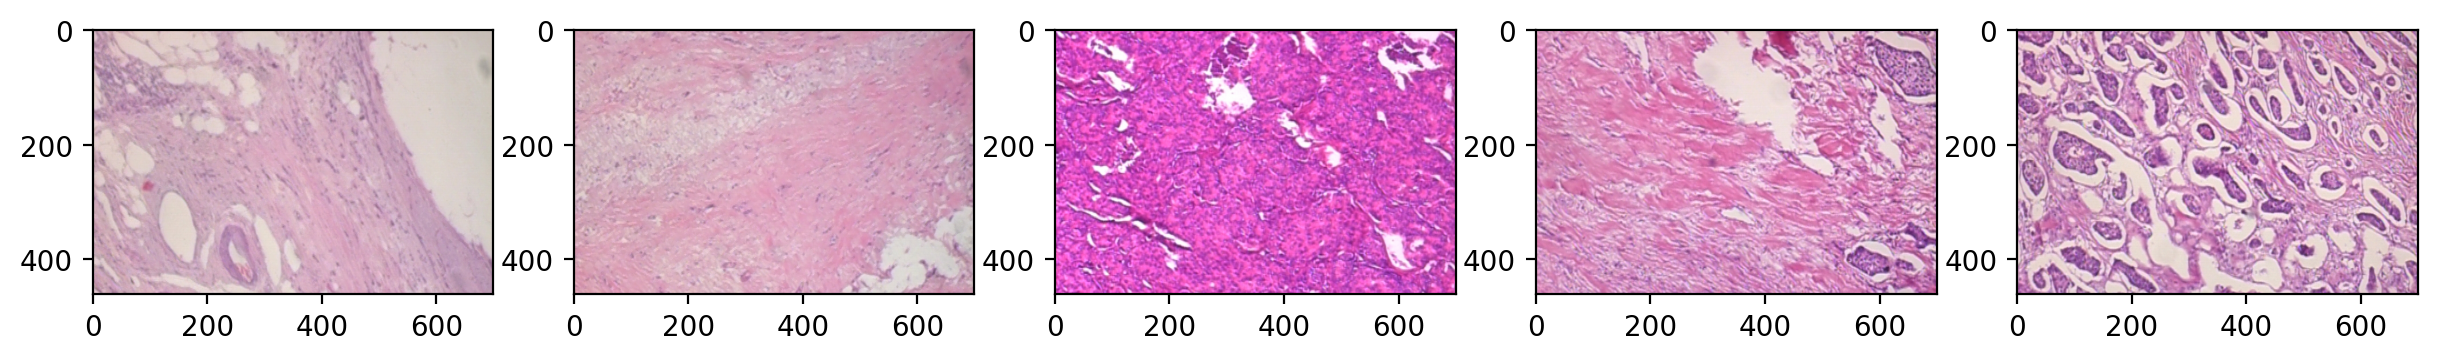

In [26]:
import matplotlib.image as img
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,l in enumerate(l):
    print(l)
    
    path = os.path.join(train_path,l)
    ax[i].imshow(img.imread(path))
    


In [27]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [28]:
class CancerDataset(Dataset):
    def __init__(self, data, path , transform = None):
        super().__init__()
        self.data = data.values
        self.path = path
        self.transform = transform
        
    def __len__(self):
       return len(self.data)
    
    def __getitem__(self,index):
        img_name,label = self.data[index]
        img_path = os.path.join(self.path, img_name)
        image = img.imread(img_path)
        
        image = image.astype(np.uint8)
        #print('Image:')
        #print(image.shape)
        if self.transform is not None:
            image = self.transform(image)
        return image, label

In [30]:
means = (0.485, 0.456, 0.406)

std=(0.229, 0.224, 0.225)

In [31]:
train_transform = transforms.Compose([transforms.ToPILImage(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(means,std),
                                    transforms.Resize([224,224])
    ])

test_transform = transforms.Compose([transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(means,std),
                                    transforms.Resize([224,224])
                                                     ])

valid_transform = transforms.Compose([transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(means,std),
                                    transforms.Resize([250,250])
                                     ])

In [32]:



train, valid_data = train_test_split(trainlabels_df, stratify=trainlabels_df.lable, test_size=0.2)




In [33]:
train_data = CancerDataset(train, train_path, train_transform )
valid_data = CancerDataset(valid_data, train_path, valid_transform )
test_data = CancerDataset(testlabels_df, test_path, test_transform )

In [34]:
# Hyper parameters

num_epochs = 30
num_classes = 2
batch_size = 50
learning_rate = 0.001

In [35]:
device = torch.device('mps' )#if torch.mps.is_available() else 'cpu')
device

device(type='mps')

In [133]:
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True, num_workers=0)
valid_loader = DataLoader(dataset = valid_data, batch_size = batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle=False, num_workers=0)

In [37]:
epochs = 30
batch_size = 50
learning_rate = 0.001

In [40]:
model =  models.resnet50(pretrained=True).to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [41]:
#model = CNN()#.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)


In [42]:
%%time
# keeping-track-of-losses 
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):
    # keep-track-of-training-and-validation-loss
    train_loss = 0.0
    valid_loss = 0.0
    
    # training-the-model
    model.train()
    for data, target in train_loader:
        
        #move-tensors-to-GPU 
        data = data.to(device)
        #print(data.shape)
        
        target = target.to(device)
        
                   

        
        # clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        
        output = model(data)
        # calculate-the-batch-loss
        #traget = torch.from_numpy(np.array(target)).long()
        #print(traget)
        loss = criterion(output, target)
        # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
        # perform-a-ingle-optimization-step (parameter-update)
        optimizer.step()
       # update-training-loss
        train_loss += loss.item() * data.size(0)
        
       
    # validate-the-model
    model.eval()
    for data, target in valid_loader:
        
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        
        loss = criterion(output, target)
        
        # update-average-validation-loss 
        valid_loss += loss.item() * data.size(0)
    
    # calculate-average-losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
        
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

Epoch: 1 	Training Loss: 1.520970 	Validation Loss: 1.274023
Epoch: 2 	Training Loss: 0.625457 	Validation Loss: 0.736282
Epoch: 3 	Training Loss: 0.572269 	Validation Loss: 0.654989
Epoch: 4 	Training Loss: 0.499361 	Validation Loss: 0.797813
Epoch: 5 	Training Loss: 0.543774 	Validation Loss: 1.380403
Epoch: 6 	Training Loss: 0.537648 	Validation Loss: 8.531708
Epoch: 7 	Training Loss: 0.506170 	Validation Loss: 0.635837
Epoch: 8 	Training Loss: 0.510597 	Validation Loss: 0.809386
Epoch: 9 	Training Loss: 0.451740 	Validation Loss: 5.461157
Epoch: 10 	Training Loss: 0.437969 	Validation Loss: 3.912826
Epoch: 11 	Training Loss: 0.429953 	Validation Loss: 1.535289
Epoch: 12 	Training Loss: 0.466938 	Validation Loss: 0.715949
Epoch: 13 	Training Loss: 0.416007 	Validation Loss: 0.662207


KeyboardInterrupt: 

In [134]:
model.eval()  # it-disables-dropout

pred =[]
lab =[]
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in valid_loader:
        
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        
        _, predicted = torch.max(outputs.data, 1)
        p =predicted.cpu()
        p =np.array(p)
        pred.append(p)
        l = labels.cpu()
        l=np.array(l)
        lab.append(l)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

# Save 

torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model: 70.4 %


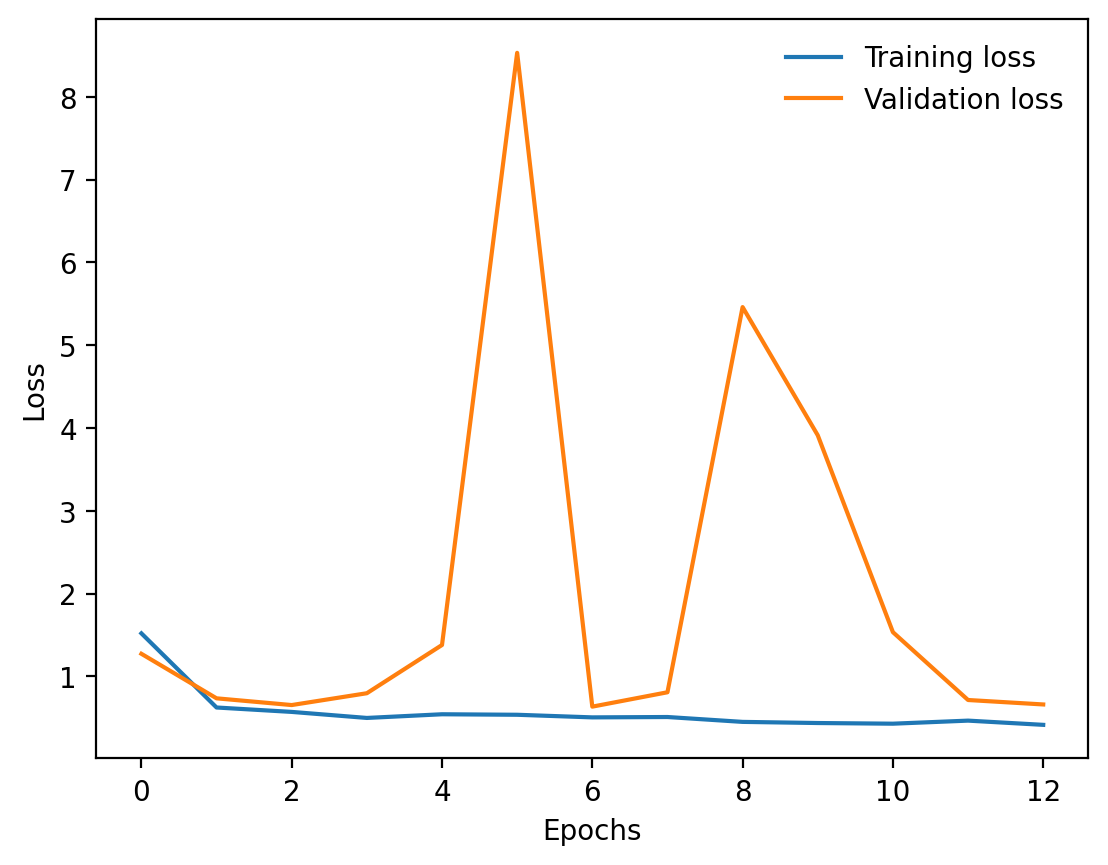

In [138]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon=False)
plt.savefig('Trainingloss')

In [135]:
pred =np.concatenate(pred)
lab =np.concatenate(lab)
print(lab)
print(pred)

[1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [136]:

from sklearn.metrics import roc_curve, auc
fpr , tpr , thresholds = roc_curve( lab , pred)
auc = auc(fpr, tpr)


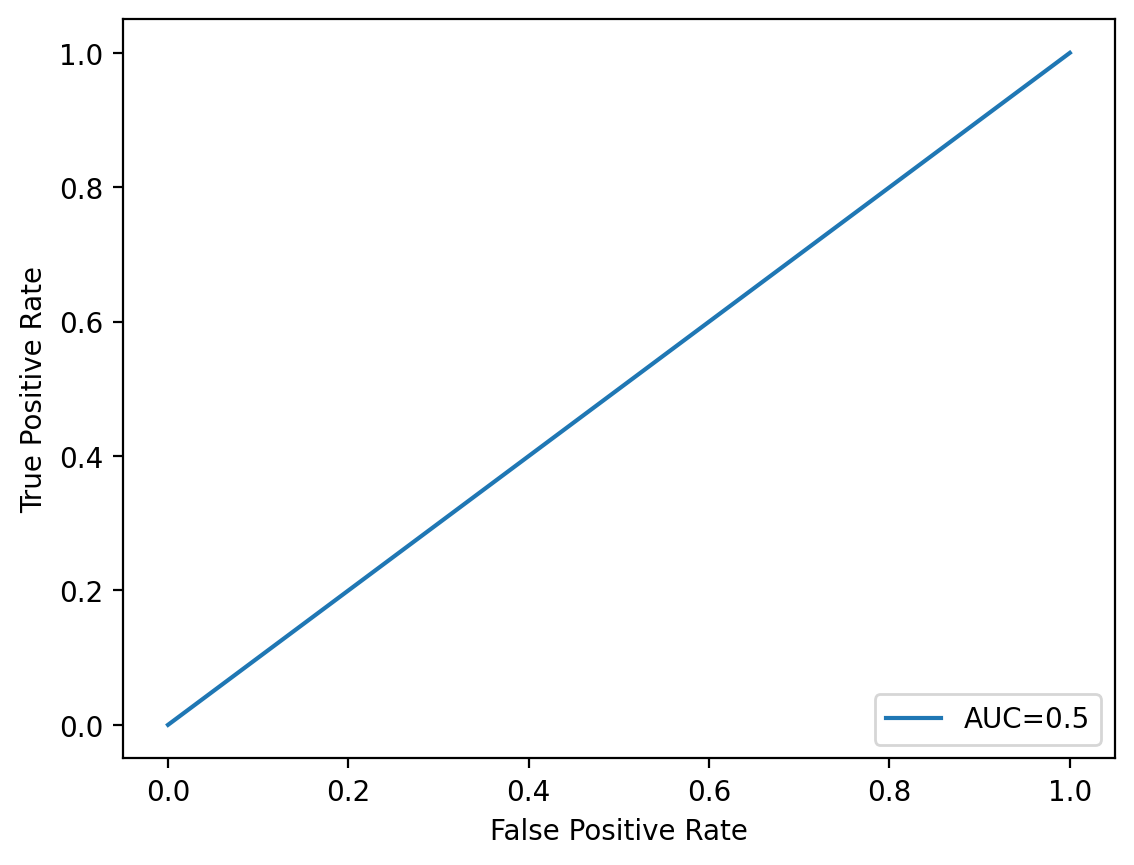

<Figure size 640x480 with 0 Axes>

In [137]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
plt.savefig('roc')